In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [32]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

train_images,test_images=train_images/255.0,test_images/255.0

In [33]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

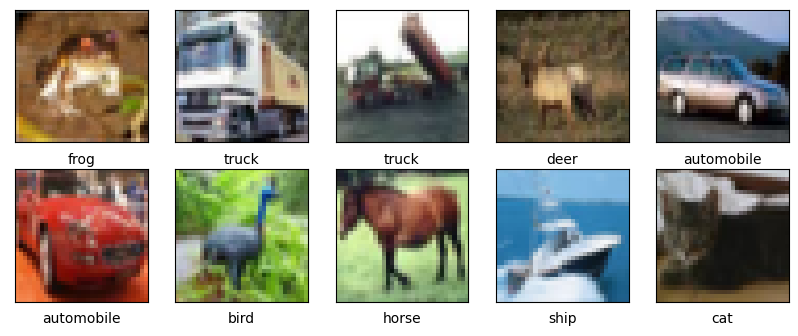

In [34]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [35]:
from keras.layers.core import Dense,Activation,Dropout,Flatten
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [36]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10))

In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [38]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [39]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [40]:
history=model.fit(train_images,train_labels,epochs=30,validation_data=(test_images,test_labels),callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4884 - accuracy: 0.4571 - val_loss: 1.2600 - val_accuracy: 0.5469
Epoch 2/30
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1551 - accuracy: 0.5906 - val_loss: 1.0801 - val_accuracy: 0.6117
Epoch 3/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0080 - accuracy: 0.6468 - val_loss: 1.0248 - val_accuracy: 0.6422
Epoch 4/30
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9013 - accuracy: 0.6823 - val_loss: 0.9351 - val_accuracy: 0.6756
Epoch 5/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8212 - accuracy: 0.7098 - val_loss: 0.9272 - val_accuracy: 0.6811
Epoch 6/30
1563/1563 [==============================] - 16s 11ms/step - loss: 0.7614 - accuracy: 0.7323 - val_loss: 0.8806 - val_accuracy: 0.6929
Epoch 7/30
1563/1563 [==============================] - 16s 11ms/step - loss: 0.7036 - accuracy: 0.7540 - val_loss: 0.8852 -

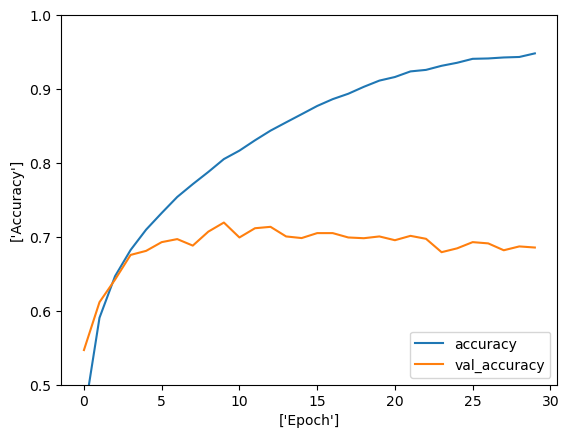

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel(['Epoch'])
plt.ylabel(['Accuracy'])
plt.ylim([.5,1])
plt.legend(loc='lower right')